In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_excel("CW_Data.xlsx")

# 移除索引列
data = data.drop('Index', axis=1)

data

,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,3,3,45.0,21,8,4,2,10.0,0
1,2,3,3,43.0,21,4,2,8,8.0,0
2,1,4,2,26.0,24,0,0,2,0.0,0
3,2,1,3,30.0,24,4,0,0,0.0,2
4,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...
614,2,1,2,55.0,33,6,4,4,8.0,0
615,2,4,2,41.0,27,6,4,4,0.0,0
616,2,1,2,73.0,36,8,8,11,10.0,0
617,2,1,2,77.0,42,8,8,6,10.0,3


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data.drop(['Programme'], axis=1)
y = data['Programme']

pca = PCA(n_components=2)
X = StandardScaler().fit_transform(X.values)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2']).values
print(principalDf.shape)

(619, 2)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(principalDf, y.values.tolist(), test_size=0.2)

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def Visualization(clf, x_train, x_test, y_train, y_test):
    # Plotting sample scatter plot
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    # Plotting decision boundary, selecting minimum and maximum values
    x_min = x_train[:, 0].min()
    x_max = x_train[:, 0].max()
    y_min = x_train[:, 1].min()
    y_max = x_train[:, 1].max()
    # Generating grid matrix
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    # Calculating the predicted class for each grid point
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    # Reshaping the predicted class to match the grid shape
    Z = Z.reshape(XX.shape)
    # Plotting the decision regions
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
    # Plotting the test set scatter plot
    plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.Paired,
                edgecolor='k', s=10)
    plt.title('Accuracy:{}'.format(clf.score(x_test, y_test)))

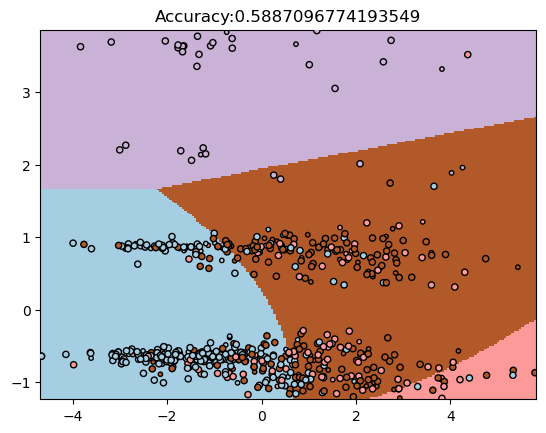

In [12]:
Visualization(gnb, x_train, x_test, y_train, y_test)